# 1. Audiobooks

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/peerkart

Mounted at /content/drive
/content/drive/MyDrive/peerkart


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from sklearn.metrics import accuracy_score

# 2. Import file
* read the csv file
* do the train, test and vali split
* create dataframes for inputs and targets

In [4]:
df = pd.read_csv('01_preprocessing.csv')
train_inputs = df[df['flag']=='Training'].drop(['flag','11'], axis=1)
train_targets = df[df['flag']=='Training'][['11']]
print(train_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
test_inputs = df[df['flag']=='Test'].drop(['flag','11'], axis=1)
test_targets = df[df['flag']=='Test'][['11']]
print(test_inputs.shape)

df = pd.read_csv('01_preprocessing.csv')
validation_inputs = df[df['flag']=='Validate'].drop(['flag','11'], axis=1)
validation_targets = df[df['flag']=='Validate'][['11']]
print(validation_inputs.shape)

(16122, 10)
(2303, 10)
(4607, 10)


# 3. Model
single layer

In [5]:
k = []
for i in range(50):
    input_size = 10
    output_size = 2
    hidden_layer_size = 30
    model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                                 tf.keras.layers.Dense(output_size, activation='softmax')])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    batch_size = 400
    max_epochs = 100
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
    history = model.fit(train_inputs, train_targets, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stopping],
                        validation_data=(validation_inputs, validation_targets), verbose = 0)

    test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
    print('Iteraion: {0:.2f}. Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(i, test_loss, test_accuracy*100.))
    k.append(test_accuracy)

72/72 [==============================] - 0s 2ms/step - loss: 0.3312 - accuracy: 0.8333
Iteraion: 0.00. Test loss: 0.00. Test accuracy: 0.33%
72/72 [==============================] - 0s 2ms/step - loss: 0.3353 - accuracy: 0.8337
Iteraion: 1.00. Test loss: 1.00. Test accuracy: 0.34%
72/72 [==============================] - 0s 2ms/step - loss: 0.3301 - accuracy: 0.8320
Iteraion: 2.00. Test loss: 2.00. Test accuracy: 0.33%
72/72 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8359
Iteraion: 3.00. Test loss: 3.00. Test accuracy: 0.32%
72/72 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8337
Iteraion: 4.00. Test loss: 4.00. Test accuracy: 0.33%
72/72 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8350
Iteraion: 5.00. Test loss: 5.00. Test accuracy: 0.33%
72/72 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8350
Iteraion: 6.00. Test loss: 6.00. Test accuracy: 0.33%
72/72 [======

0.834
0.003


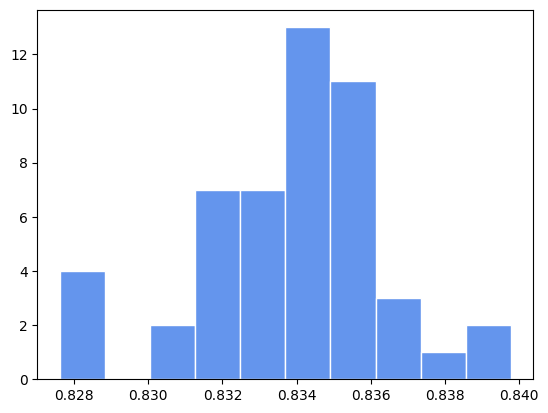

In [6]:
plt.hist(k, color='cornflowerblue', edgecolor='white')
print(np.round(np.mean(k),3))
print(np.round(np.std(k),3))

# 4. Model
double layer

In [7]:
k = []
for i in range(50):
    input_size = 10
    output_size = 2
    hidden_layer_size = 15
    model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                                 tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
                                 tf.keras.layers.Dense(output_size, activation='softmax')])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    batch_size = 400
    max_epochs = 100
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
    history = model.fit(train_inputs, train_targets, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stopping],
                        validation_data=(validation_inputs, validation_targets), verbose = 0)

    test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
    print('Iteraion: {0:.2f}. Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(i, test_loss, test_accuracy*100.))
    k.append(test_accuracy)

72/72 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8354
Iteraion: 0.00. Test loss: 0.00. Test accuracy: 0.32%
72/72 [==============================] - 0s 2ms/step - loss: 0.3304 - accuracy: 0.8311
Iteraion: 1.00. Test loss: 1.00. Test accuracy: 0.33%
72/72 [==============================] - 0s 2ms/step - loss: 0.3236 - accuracy: 0.8328
Iteraion: 2.00. Test loss: 2.00. Test accuracy: 0.32%
72/72 [==============================] - 0s 3ms/step - loss: 0.3328 - accuracy: 0.8337
Iteraion: 3.00. Test loss: 3.00. Test accuracy: 0.33%
72/72 [==============================] - 0s 2ms/step - loss: 0.3505 - accuracy: 0.8250
Iteraion: 4.00. Test loss: 4.00. Test accuracy: 0.35%
72/72 [==============================] - 0s 2ms/step - loss: 0.3341 - accuracy: 0.8302
Iteraion: 5.00. Test loss: 5.00. Test accuracy: 0.33%
72/72 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8359
Iteraion: 6.00. Test loss: 6.00. Test accuracy: 0.33%
72/72 [======

0.832
0.003


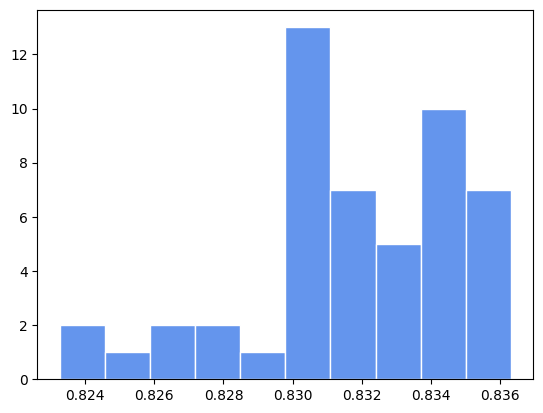

In [8]:
plt.hist(k, color='cornflowerblue', edgecolor='white')
print(np.round(np.mean(k),3))
print(np.round(np.std(k),3))

# 5. Model
tripe layer

In [9]:
k = []
for i in range(50):
    input_size = 10
    output_size = 2
    hidden_layer_size = 10
    model = tf.keras.Sequential([tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 1st hidden layer
                                 tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 2nd hidden layer
                                 tf.keras.layers.Dense(hidden_layer_size, activation='relu'), # 3rd hidden layer
                                 tf.keras.layers.Dense(output_size, activation='softmax')])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    batch_size = 400
    max_epochs = 100
    early_stopping = tf.keras.callbacks.EarlyStopping(patience=3)
    history = model.fit(train_inputs, train_targets, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stopping],
                        validation_data=(validation_inputs, validation_targets), verbose = 0)

    test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)
    print('Iteraion: {0:.2f}. Test loss: {0:.2f}. Test accuracy: {1:.2f}%'.format(i, test_loss, test_accuracy*100.))
    k.append(test_accuracy)

72/72 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8337
Iteraion: 0.00. Test loss: 0.00. Test accuracy: 0.34%
72/72 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.8359
Iteraion: 1.00. Test loss: 1.00. Test accuracy: 0.35%
72/72 [==============================] - 0s 2ms/step - loss: 0.3425 - accuracy: 0.8211
Iteraion: 2.00. Test loss: 2.00. Test accuracy: 0.34%
72/72 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8272
Iteraion: 3.00. Test loss: 3.00. Test accuracy: 0.35%
72/72 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8298
Iteraion: 4.00. Test loss: 4.00. Test accuracy: 0.35%
72/72 [==============================] - 0s 2ms/step - loss: 0.3608 - accuracy: 0.8259
Iteraion: 5.00. Test loss: 5.00. Test accuracy: 0.36%
72/72 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.8337
Iteraion: 6.00. Test loss: 6.00. Test accuracy: 0.35%
72/72 [======

0.83
0.005


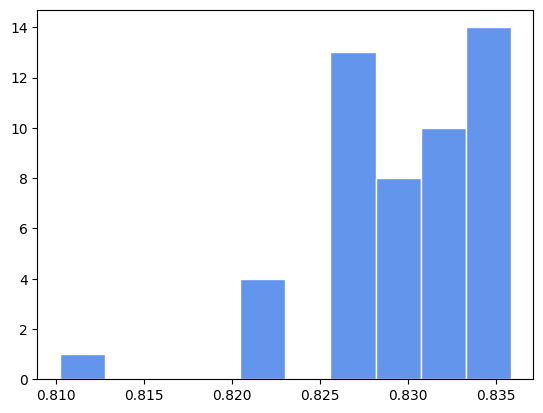

In [10]:
plt.hist(k, color='cornflowerblue', edgecolor='white')
print(np.round(np.mean(k),3))
print(np.round(np.std(k),3))